In [1]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib.pyplot as plt
import pywt
#读取相应txt文件
def read_txt(data):
    df=pd.read_json(data,encoding='UTF-8')
    columns=['busSpeed','gatherTime','sationUuid','sationName']
    columns1=['busspeed','gathertime','sationuuid','sationname']
    df=df[columns]
    df.columns=columns1
    mask=((df.sationuuid==''))
    df.loc[mask,'sationuuid']=np.nan
    df.sationuuid.interpolate(method='bfill',inplace=True)
    df.dropna()
    time1=list()
    for i in range(len(df.gathertime)):
        time1.append(timestamp_to_date(timestamp_to_timestamp10(df.gathertime[i])))
    df['Time']=time1
    df.set_index('Time',inplace=True)
    return df
#   df.to_excel('d:/gps/data.xlsx')
#将13位时间戳转换为10位时间戳
def timestamp_to_timestamp10(time_stamp):
    time_stamp = int (time_stamp* (10 ** (10-len(str(time_stamp)))))
    return time_stamp
#时间格式的转换
def timestamp_to_date(time_stamp, format_string="%Y-%m-%d %H:%M:%S"):
    time_array = time.localtime(time_stamp)
    str_date = time.strftime(format_string, time_array)
    return str_date
#df=read_txt('d:gps/2017-09-20/32/钂橝70326.txt')
df.sationuuid.fillna(method='bfill',inplace=True)
df=df['2017-09-20 05：59：57':'2017-09-20 09:00:27']
df=df[(df.sationuuid>='5')|(df.sationuuid<='22')]
mask=df.sationuuid=='1'
df.loc[mask,['busspeed']]=np.nan
df.to_excel('d:data/9-20/32/70326.xlsx')

ValueError: Expected object or value

### 回头再试一下，好像字符串的比较方式不是按照数字

In [9]:
import os 
def auto_read(input_path,output_path,start_time,end_time):
    files=os.listdir(input_path)
    domain=os.path.abspath(input_path)
    domain1=os.path.abspath(output_path)
    stamp=pd.date_range('2017-09-20 06:00:00',periods=1800,freq='6s')
    for i in range(0,len(files)):
        info=os.path.join(domain,files[i])
        if os.path.isfile(info):
            df=read_txt(info)
            df.sationuuid.fillna(method='bfill',inplace=True)
            if start_time:
                df=df[start_time:end_time]
                df=df[(df.sationuuid>='9')|(df.sationuuid<'21')]
                mask=df.sationuuid=='1'
                df.loc[mask,['busspeed']]=np.nan
                df.fillna(0)
                df.drop_duplicates(inplace=True)
            else:
                print('will download all data')
                #mask=((df.busSpeed<=5)&(df.sationUuid=='1'))
                #df.loc[mask,['busSpeed']]=np.nan
                
        a=domain1+files[i].replace('.txt','')+'.xlsx'
        df.to_excel(a)

In [10]:
auto_read('d:/gps/gps/2017-09-23/32/','d:时间段数据/9-23/32/07-09/','2017-09-23 06:00:00','2017-09-23 09:00:25')

In [6]:
import os
from matplotlib import  pyplot as plt
def plot_df(input_path):
    files=os.listdir(input_path)
    domain=os.path.abspath(input_path)
    for i in range(0,len(files)):
        info=os.path.join(domain,files[i])
        if os.path.isfile(info):
            df=pd.read_excel(info)
            plt.subplot(len(files),1,i+1)
            plt.plot(df.busspeed)
            plt.legend()
    plt.show()

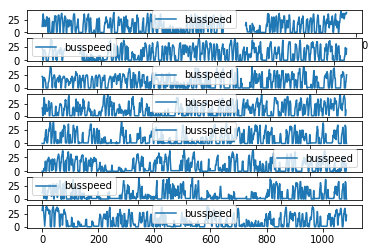

In [7]:
plot_df('d:data/9-22/32/')

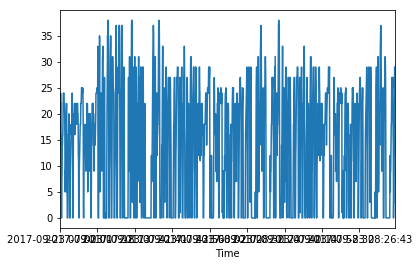

In [24]:
df=pd.read_excel('d:/data/9-23/32钂橝70385.xlsx',index_col=0)
df.busspeed.plot()
plt.show()

In [31]:
df=pd.read_excel('d:data/9-20/3236574..xlsx')
df1=pd.read_excel('d:data/9-20/32钂橝70326..xlsx')

In [35]:
df=pd.read_excel('d:data/9-20/72/merge.xlsx')
df.corr()

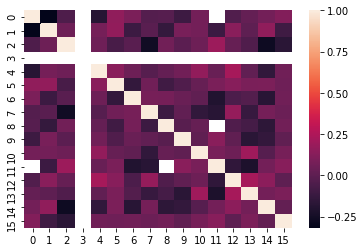

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df.corr()
sns.heatmap(data)
plt.show()

In [42]:
def if_(to_files):
    if to_files:
        print('true')
    print('hh')

In [43]:
if_(to_files=False)

hh


In [50]:
domain=os.path.abspath('d:data/9-20/72/')
info=os.path.join(domain,files[1])
df=pd.read_excel(info)

In [51]:
df

,Time,busspeed,gathertime,sationuuid,sationname
0,2017-09-20 07:00:00,NaN,1505862000000,1,范家营
1,2017-09-20 07:00:00,NaN,1505862000000,1,范家营
2,2017-09-20 07:00:07,NaN,1505862007000,1,范家营
3,2017-09-20 07:00:12,NaN,1505862012000,1,范家营
4,2017-09-20 07:00:19,NaN,1505862019000,1,范家营
5,2017-09-20 07:00:24,NaN,1505862024000,1,范家营
6,2017-09-20 07:00:30,NaN,1505862030000,1,范家营
7,2017-09-20 07:00:38,NaN,1505862038000,1,范家营
8,2017-09-20 07:00:43,NaN,1505862043000,1,范家营
9,2017-09-20 07:00:50,NaN,1505862050000,1,范家营


In [70]:
stamp=pd.date_range('2018-5-7 7:00',periods=1200,freq='6s')

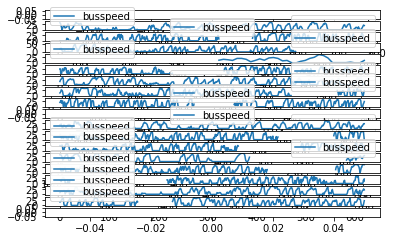

In [72]:
plt.plot(x=stamp,y=range(1,1200))
plt.show()

In [73]:
y=range(1,1200)
y

range(1, 1200)